<font size="10" color="black">Amostragem</font>

Eduardo Chaves Ferreira

## Importação de bibliotecas usadas nos exemplos

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat
from collections import Counter
from scipy.stats import t
from scipy.stats import norm

database = pd.read_csv("D:/Temp/jupyter/2015.csv")

In [2]:
database.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [3]:
database.head ()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Mantendo a reprodutibilidade dos resultados

Antes da geração de números aleatórios é importante inicializar o gerador de números para que os resultados sejam os mesmos

In [4]:
# Para uso com funções da biblioteca standard (ex random.randint)
random.seed(1)
# Para uso com funções da biblioteca numpy (ex np.random.randint)
np.random.seed(1)

# Quando for passada como parâmetro a seed
random_state = 1

## Funções gerais usadas nos exemplos

In [5]:
# Calcula número de desvios na distribuição t de student para determinada confianca


def calcula_Z_tstudent(confianca, tamanho_amostra):
    mean = 0
    std = 1
    rv = t(df=(tamanho_amostra-1))
    return rv.interval(confianca)[1]

In [6]:
# Calcula número de desvios na distribuição normal para determinada confianca


def calcula_Z_normal(confianca):
    mean = 0
    std = 1
    rv = norm(loc=mean, scale=std)
    return rv.interval(confianca)[1]

In [7]:
# Calcula número de desvios na distribuição normal para determinada confianca e múltiplas proporções

def calcula_Z_Multiplas_Proporcoes(confianca, numero_proporcoes):
    area = math.pow(  confianca, 1/(numero_proporcoes-1) )
    return calcula_Z_normal(area)



In [8]:
# Recupera amostra da população

def recupera_amostra(populacao, tamanho_amostra):
    tamanho_amostra = int(tamanho_amostra)
    if type(populacao) is pd.DataFrame:
        return populacao.sample(tamanho_amostra)
    else:
        #return populacao[np.random.randint(0, len(populacao), tamanho_amostra)]
        return [populacao[i] for i in np.random.randint(0, len(populacao), tamanho_amostra)]

In [9]:
# Função que calcula intervalo de confiança para média com base em uma amostra e a confiança desejada

def calcula_intervalo_media(amostra, confianca, tamanho_populacao):
    tamanho_amostra = len(amostra)
    
    #1-Calcule a média da amostra ex. media_amostra = np.mean(amostra)
    media_amostra = np.mean(amostra)

    #2-Calcule o desvio da amostra ex. desvio_amostra = np.std(amostra)
    desvio_amostra = np.std(amostra)

    #3-Calcule quantos desvios precisará para seu grau de confiânça ex. numero_desvios = calcula_numero_desvios_tstudent_para_confianca(confiança, tamanho_amostra)
    numero_desvios = calcula_Z_tstudent(confianca, tamanho_amostra)

    #4-Calcule o desvio das amostras ex. desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)
    desvio_amostras = desvio_amostra/np.sqrt(tamanho_amostra)

    #5-Calcule a margem de erro ex. margem_erro = numero_desvios*desvio_amostras
    margem_erro = numero_desvios*desvio_amostras
    
    if tamanho_amostra>0.05*tamanho_populacao:
        margem_erro = margem_erro * (np.sqrt(tamanho_populacao-tamanho_amostra)/np.sqrt(tamanho_populacao-1))

    #6-Calcule o intervalo ex. inferior = media_amostra-margem_erro, superior = media_amostra+margem_erro
    inferior = media_amostra-margem_erro
    superior = media_amostra+margem_erro

    return inferior,superior

In [10]:
# Função que calcula intervalo de confiança para proporção de determinado valor com base em uma amostra e a confiança desejada
# O parâmetro valor representa a categoria na amostra para a qual se deseja o intervalo de confiança da proporção, por exemplo o nome de um candidato

def calcula_intervalo_proporcao(amostra, confianca, valor, tamanho_populacao):
    tamanho_amostra = len(amostra)
    
    proporcao_valor = Counter(amostra)[valor]/tamanho_amostra
    
    numero_desvios = calcula_Z_tstudent(confianca, tamanho_amostra)

    margem_erro = numero_desvios*np.sqrt(proporcao_valor*(1-proporcao_valor))/np.sqrt(tamanho_amostra)
    
    if tamanho_amostra>0.05*tamanho_populacao:
        margem_erro = margem_erro * (np.sqrt(tamanho_populacao-tamanho_amostra)/np.sqrt(tamanho_populacao-1))

    inferior = proporcao_valor-margem_erro
    superior = proporcao_valor+margem_erro

    return inferior,superior

In [11]:
# Função para cálculo do número de amostras para médias e somas

def Tamanho_Amostra_Valor_Pontual(Tamanho_Populacao, Numero_Desvios, Variancia, Margem_Erro):
    return math.ceil( 
            (Tamanho_Populacao * math.pow(Numero_Desvios,2) * Variancia) / \
            ( (Tamanho_Populacao-1)*math.pow(Margem_Erro,2) + math.pow(Numero_Desvios,2)*Variancia )
            )

In [12]:
# Função para cálculo do número de amostras para proporções simples

def Tamanho_Amostra_Proporcao_Simples(Tamanho_Populacao, Numero_Desvios, Proporcao, Margem_Erro):
    return math.ceil( 
            (Tamanho_Populacao * math.pow(Numero_Desvios,2) * Proporcao * (1-Proporcao)) / \
            ( (Tamanho_Populacao-1)*math.pow(Margem_Erro,2) + math.pow(Numero_Desvios,2)*Proporcao*(1-Proporcao) )
            )

In [13]:
# Função para cálculo do tamanho da amostra para proporções múltiplas

def Tamanho_Amostra_Proporcao_Multipla(Tamanho_Populacao, Confianca, Numero_Proporcoes, Margem_Erro):
    Confianca_ = calcula_Z_Multiplas_Proporcoes(Confianca, Numero_Proporcoes)
    return math.ceil( 
            (Tamanho_Populacao * math.pow(Confianca_,2) * 0.25 ) / \
            ( (Tamanho_Populacao-1)*math.pow(Margem_Erro,2) + math.pow(Confianca_,2)*0.25 )
            )

In [52]:
database["Region"].value_counts()


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [53]:
database["Region"].count()

158

In [121]:
# Cria estrutura vazia para guadar dados da população
populacao = pd.DataFrame(columns=['Regiao'])


# Atribui valor ao Dataframe de acordo com os resultados anteriores

In [122]:
#População Dividida por Região
populacao.Regiao = ["AfricaSubSariana"]*40 + ["LesteEuropeu"]*29 + ["AmericaLatina"]*22 + ["EuropaOcidental"]*21 + ["AfricaNorte"]*20 + ["SudesteAsia"]*9 + ["SudoesteAsia"]*7 + ["Outros"]*10
populacao.head()

,Regiao
0,AfricaSubSariana
1,AfricaSubSariana
2,AfricaSubSariana
3,AfricaSubSariana
4,AfricaSubSariana


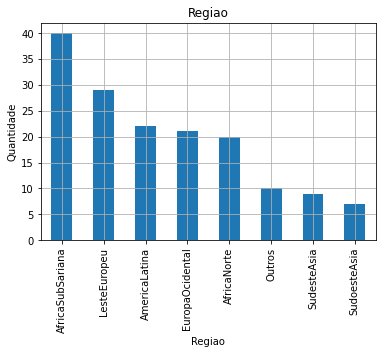

In [123]:
populacao['Regiao'].value_counts().plot(kind='bar')
plt.xlabel('Regiao')
plt.ylabel('Quantidade')

plt.title('Regiao')
plt.grid(True)
plt.show()

# Procurou outra clínica?

In [18]:
# 218 pacientes da pública procuraram outra clínica (24%), 300 da privada procuraram (26,1%)
populacao.Procurou_Outra_Clinica = ['S']*218 + ['N']*691 + ['S']*300 + ['N']*848
populacao.head()

,Area,Procurou_Outra_Clinica,Dias_Ate_Atendimento,Satisfacao
0,Publico,S,NaN,NaN
1,Publico,S,NaN,NaN
2,Publico,S,NaN,NaN
3,Publico,S,NaN,NaN
4,Publico,S,NaN,NaN


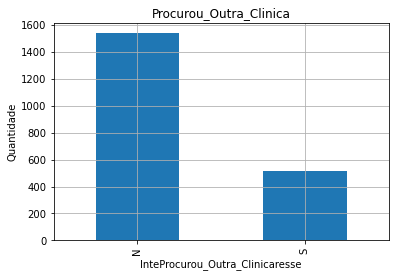

NameError: name 'Tamanho_Populacao' is not defined

In [19]:
populacao['Procurou_Outra_Clinica'].value_counts().plot(kind='bar')
plt.xlabel('InteProcurou_Outra_Clinicaresse')
plt.ylabel('Quantidade')

plt.title('Procurou_Outra_Clinica')
plt.grid(True)
plt.show()

print(sum(populacao.Procurou_Outra_Clinica == 'S')/Tamanho_Populacao)

# Dias até atendimento

In [ ]:
# Dias para atendimento média 71 pública, 53 na privada, desvio 22.5 ambas
rv_pub = norm(loc=71, scale=18.73)
rv_pri = norm(loc=53, scale=14.69)
populacao.Dias_Ate_Atendimento =  list(rv_pub.rvs(size=909)) + list(rv_pri.rvs(size=1148))
populacao.Dias_Ate_Atendimento = populacao.Dias_Ate_Atendimento.astype('int')
populacao.loc[populacao.Dias_Ate_Atendimento <1,['Dias_Ate_Atendimento']] = 1
populacao.head()

In [ ]:
n, bins, patches = plt.hist(populacao.Dias_Ate_Atendimento,  facecolor='g', alpha=0.75, bins=50)
plt.xlabel('Dias_Ate_Atendimento')
plt.ylabel('Quantidade')

plt.title('Dias_Ate_Atendimento')
plt.grid(True)
plt.show()

print(populacao.Dias_Ate_Atendimento.mean())

# Satisfação com atendimento

In [ ]:
# Grau de satisfação arbitrado
populacao.Satisfacao = random.choices(population=['I','R','S'], weights=[0.2,0.5,0.3], k=2057)
populacao.head()

In [ ]:
populacao['Satisfacao'].value_counts().plot(kind='bar')
plt.xlabel('Satisfacao')
plt.ylabel('Quantidade')

plt.title('Satisfacao')
plt.grid(True)
plt.show()

print(sum(populacao.Satisfacao == 'I')/Tamanho_Populacao)

# Embaralha registros

In [ ]:
from sklearn.utils import shuffle
populacao = shuffle(populacao)
populacao.head()

# Separa a população em duas sub populações: atendidos por clínicas públicas e privadas

In [ ]:
Populacao_Clinicas_Publicas = populacao.loc[populacao.Area == 'Publico',:]
Tamanho_Populacao_Clinicas_Publicas = len(Populacao_Clinicas_Publicas)
Populacao_Clinicas_Privadas = populacao.loc[populacao.Area == 'Privado',:]
Tamanho_Populacao_Clinicas_Privadas = len(Populacao_Clinicas_Privadas)

<font size="6" color="red">Amostra piloto</font>

# Define margem de erro e grau de confiança

In [ ]:
# Definições gerais
Margem_Erro_Dias = 3
Margem_Erro_ProcurouOutraClinica = 0.05
Margem_Erro_Satisfacao = 0.05
    
Grau_Confianca = 0.95

# Se tiver informações sobre a população, estima variância e proporções

In [ ]:
# Definições específicas (quando já se conhece a população)
Variancia_Dias_Estimada = 506
Proporcao_Procurou_Outra_Clinica_Amostra = 0.3


# Se não tiver informações sobre a população, estima variância e proporções em amostra piloto (mínimo 30 elementos)

In [ ]:
# Definições específicas (quando faz amostra piloto)
Tamanho_Amostra = 30
amostra = recupera_amostra(populacao, Tamanho_Amostra)
Variancia_Dias_Estimada = amostra.Dias_Ate_Atendimento.var()
Proporcao_Procurou_Outra_Clinica_Amostra = sum(amostra.Procurou_Outra_Clinica == 'S')/Tamanho_Amostra
print('Amostra {}, variância dias {}, proporção procurou outra clínica {}'.format(
                                                            Tamanho_Amostra,
                                                            Variancia_Dias_Estimada,
                                                            Proporcao_Procurou_Outra_Clinica_Amostra))

# Cálcula tamanho amostra para Dias

In [ ]:
z = calcula_Z_normal(Grau_Confianca)

Tamanho_Amostra_Dias = Tamanho_Amostra_Valor_Pontual(
    Tamanho_Populacao,
    z,
    Variancia_Dias_Estimada,
    Margem_Erro_Dias)

Tamanho_Amostra_Dias

# Calcula tamanho amostra para procurou outra clínica

In [ ]:
z = calcula_Z_normal(Grau_Confianca)

Tamanho_Amostra_Procurou_Outra_Clinica = Tamanho_Amostra_Proporcao_Simples(
    Tamanho_Populacao,
    z,
    Proporcao_Procurou_Outra_Clinica_Amostra,
    Margem_Erro_ProcurouOutraClinica
)

Tamanho_Amostra_Procurou_Outra_Clinica

# Calcula tamanho da amostra para satisfação

In [ ]:
Tamanho_Amostra_Satisfacao = Tamanho_Amostra_Proporcao_Multipla(
    Tamanho_Populacao,
    Grau_Confianca,
    3,
    Margem_Erro_Satisfacao
)

Tamanho_Amostra_Satisfacao

# Resumo

In [ ]:
print('Tamanho_Amostra_Dias {}, Tamanho_Amostra_Procurou_Outra_Clinica {}, Tamanho_Amostra_Satisfacao {}'.format(
    Tamanho_Amostra_Dias, 
    Tamanho_Amostra_Procurou_Outra_Clinica, 
    Tamanho_Amostra_Satisfacao))

<font size="6" color="red">Inferência dos parâmetros populacionais com base numa amostra</font>

## Cálculo intervalo de confiança para dias

In [ ]:
amostraDias = recupera_amostra(populacao, Tamanho_Amostra_Dias)
amostraDias = amostraDias.Dias_Ate_Atendimento

In [ ]:
amostraDias.var()

In [ ]:
confianca = 0.95

inferior,superior = calcula_intervalo_media(amostraDias, confianca, Tamanho_Populacao)
print('Intervalo da média {} {}'.format(inferior,superior))

In [ ]:
print('Margem de erro {}'.format((superior-inferior)/2))

## Cálculo intervalo de confiança para procurou outra clínica

In [ ]:
amostraProcurouOutraClinica = recupera_amostra(populacao, Tamanho_Amostra_Procurou_Outra_Clinica)
amostraProcurouOutraClinica = amostraProcurouOutraClinica.Procurou_Outra_Clinica

In [ ]:
confianca = 0.95

inferior,superior = calcula_intervalo_proporcao(amostraProcurouOutraClinica, confianca, 'S', Tamanho_Populacao)
print('Intervalo da média {} {}'.format(inferior,superior))

In [ ]:
print('Margem de erro {}'.format((superior-inferior)/2))

## Cálculo intervalo de confiança para satisfação

In [ ]:
amostraSatisfacao = recupera_amostra(populacao, Tamanho_Amostra_Satisfacao)
amostraSatisfacao = amostraSatisfacao.Satisfacao

In [ ]:
confianca = 0.95

inferior,superior = calcula_intervalo_proporcao(amostraSatisfacao, confianca, 'I', Tamanho_Populacao)
print('Intervalo da média {} {}'.format(inferior,superior))

In [ ]:
print('Margem de erro {}'.format((superior-inferior)/2))

<font size="6" color="red">Fazendo amostra estratificada</font>

In [ ]:
proporcao_publico = Tamanho_Populacao_Clinicas_Publicas/Tamanho_Populacao

proporcao_privado = Tamanho_Populacao_Clinicas_Privadas/Tamanho_Populacao

In [ ]:
amostraDiasPublico = recupera_amostra(Populacao_Clinicas_Publicas, proporcao_publico*Tamanho_Amostra_Dias)
amostraDiasPrivado = recupera_amostra(Populacao_Clinicas_Privadas, proporcao_privado*Tamanho_Amostra_Dias)

In [ ]:
amostraDias = pd.concat([amostraDiasPublico,amostraDiasPrivado]).Dias_Ate_Atendimento
len(amostraDias)

In [ ]:
confianca = 0.95

inferior,superior = calcula_intervalo_media(amostraDias, confianca, Tamanho_Populacao)
print('Intervalo da média {} {}'.format(inferior,superior))

In [ ]:
print('Margem de erro {}'.format((superior-inferior)/2))